In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/home/abdulaziz/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data=pd.read_csv("BostonHousing.csv")
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


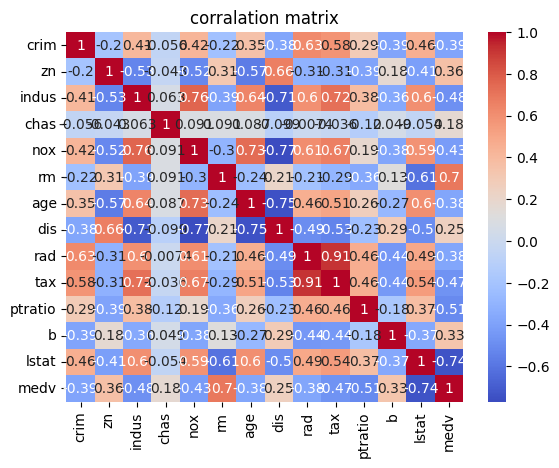

In [3]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("corralation matrix")
plt.show()


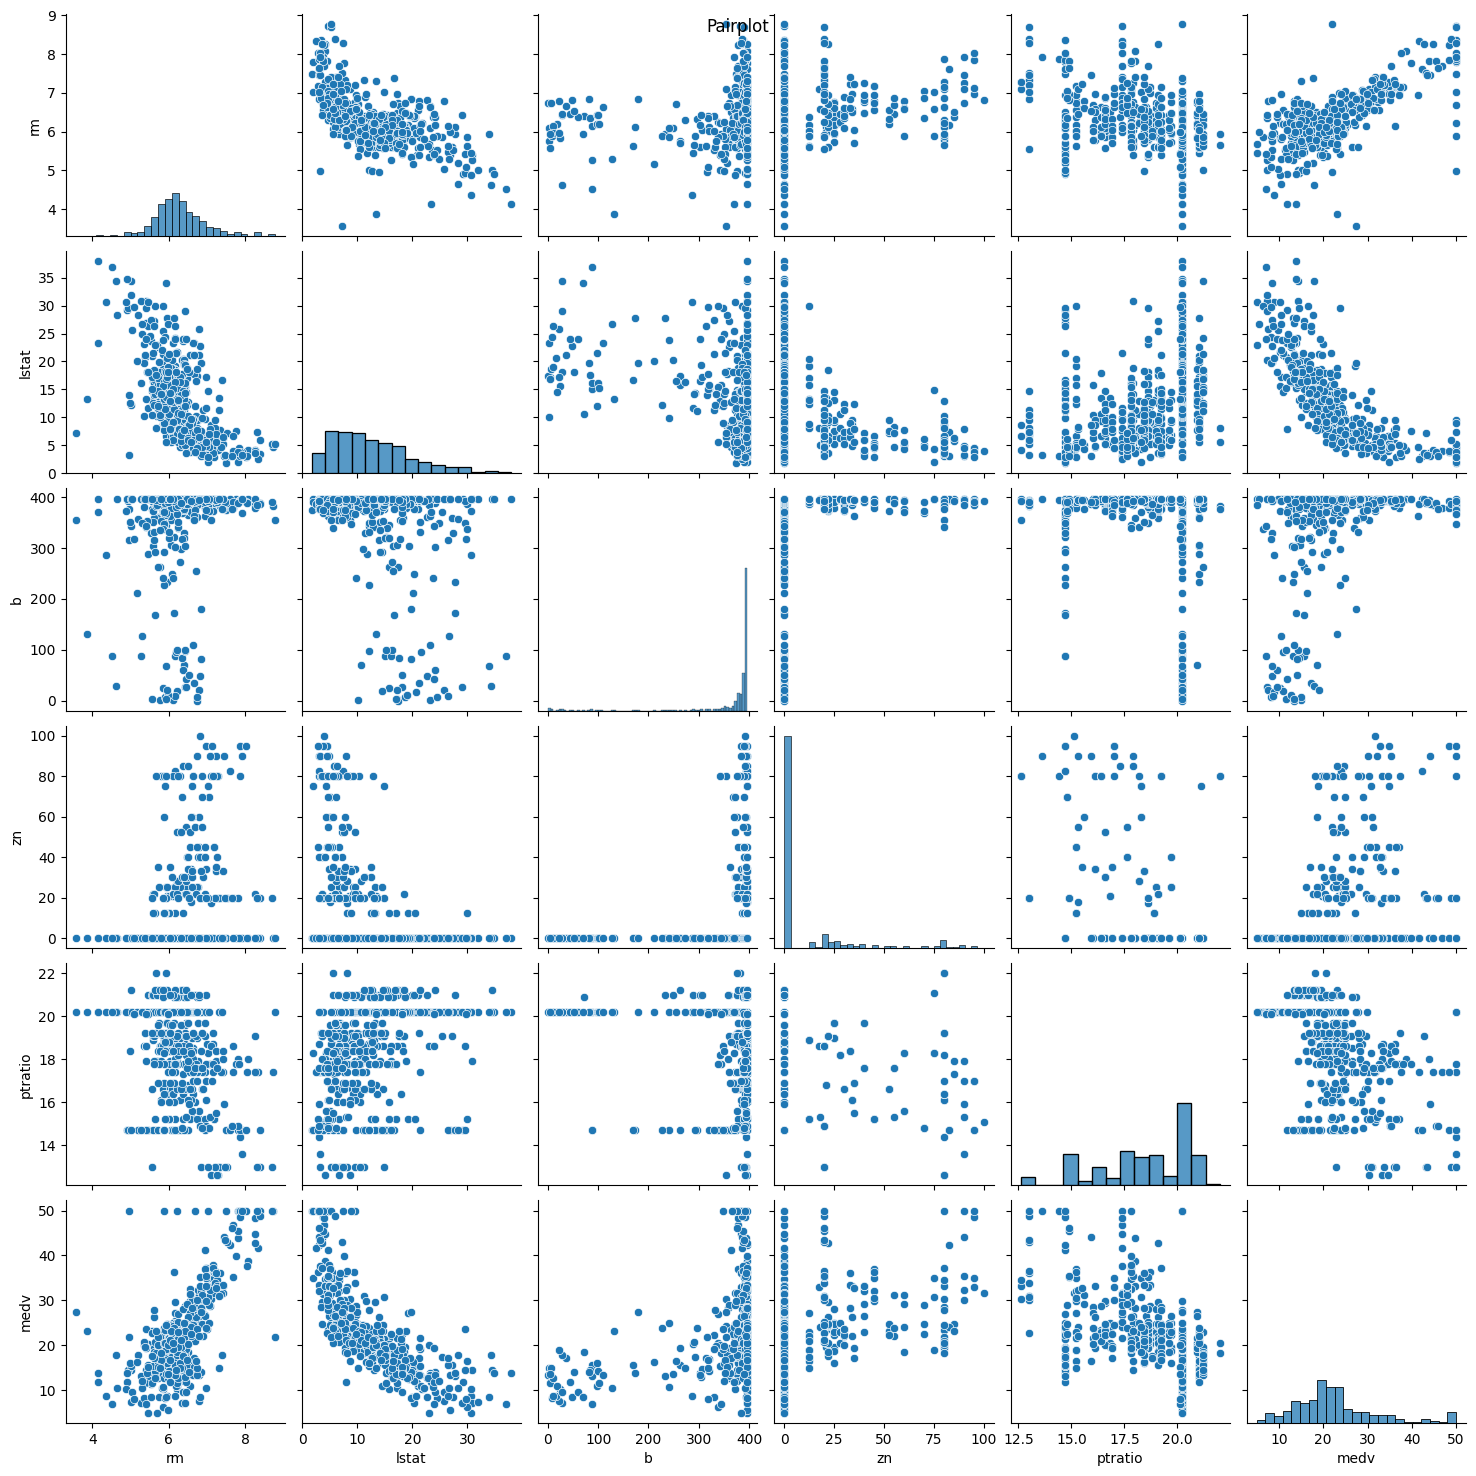

In [4]:
selected_feature = ['rm', 'lstat', 'b', 'zn', 'ptratio', 'medv']
sns.pairplot(data[selected_feature])
plt.suptitle('Pairplot')
plt.show()


In [5]:
x=data[['rm']] # input
y=data['medv'] # label

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

model=LinearRegression()
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2 )

40.35144969787306
4.314224104076755
0.45846499343030667


In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

model=Lasso(alpha=0.2)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2 )

40.409463058090026
4.337448830422163
0.4576864274644876


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

model=Ridge(alpha=100)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2 )

44.90552486355741
4.748699272632397
0.3973472109656597


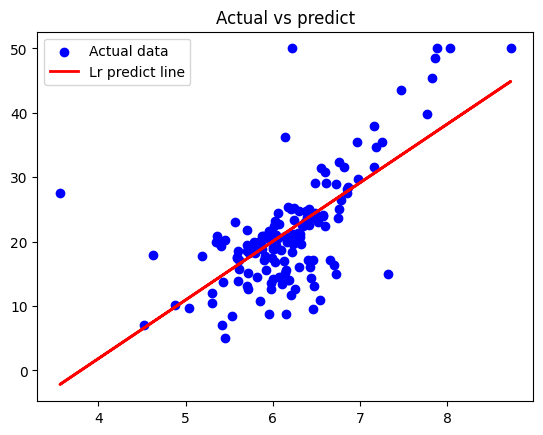

In [7]:
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Lr predict line')
plt.title('Actual vs predict')
plt.legend()
plt.show()

In [10]:
print(x_test.shape, x_test.shape)

(102, 1) (102, 1)
